# Unsupervised Learning Project
## Qualitative Bankruptcy case study

In [1]:
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

### Read the dataset and understand the features and target variable. 

### Attribute Information
(P=Positive,A-Average,N-negative,B-Bankruptcy,NB-Non-Bankruptcy)
 
     1. Industrial Risk: {P,A,N}
     2. Management Risk: {P,A,N}
     3. Financial Flexibility: {P,A,N}
     4. Credibility: {P,A,N}
     5. Competitiveness: {P,A,N}
     6. Operating Risk: {P,A,N}
     7. Class: {B,NB}

In [2]:
#Read the data from local copy
bank_df = pd.read_table("Qualitative_Bankruptcy.data.txt",sep=",",header=None,\
            names=["Industrial Risk","Management Risk","Financial Flexibility",\
                   "Credibility","Competitiveness","Operating Risk","Class"])

#sanity check
bank_df.head()

,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk,Class
0,P,P,A,A,A,P,NB
1,N,N,A,A,A,N,NB
2,A,A,A,A,A,A,NB
3,P,P,P,P,P,P,NB
4,N,N,P,P,P,N,NB


In [3]:
#Keep a copy for use if needed later without loading again from disk
bank_df_copy = bank_df.copy()

In [4]:
#Lets explore the basic characteristics of the dataset
bank_df.shape
#250 records with 7 features including Class which is the dependent variable

(250, 7)

In [5]:
#Check the data types and missing values
bank_df.info()

#As outlined earlier in problem statement there are no missing values and all are of object type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
Industrial Risk          250 non-null object
Management Risk          250 non-null object
Financial Flexibility    250 non-null object
Credibility              250 non-null object
Competitiveness          250 non-null object
Operating Risk           250 non-null object
Class                    250 non-null object
dtypes: object(7)
memory usage: 13.8+ KB


In [6]:
#Lets check the distribution of the various features 
#Lets check the distribution of the Class variable
bank_df["Class"].value_counts()

NB    143
B     107
Name: Class, dtype: int64

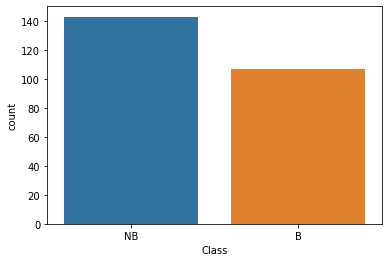

In [7]:
#Visualize
sns.countplot(bank_df["Class"])

#While not completely balanced this is probably ok.
#We will not for now do any treatment with respect to class imbalance

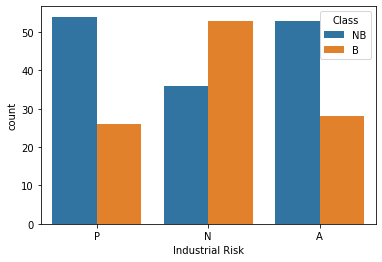

In [8]:
#Lets check the remaining columns
sns.countplot(bank_df["Industrial Risk"],hue=bank_df["Class"])

#kind of equal distribution overall
#More bankruptcy cases as expected when risk is negative while average and positive risk have lesser cases
#Average and Positive cases also kind of have equal distribution of bankruptcy cases

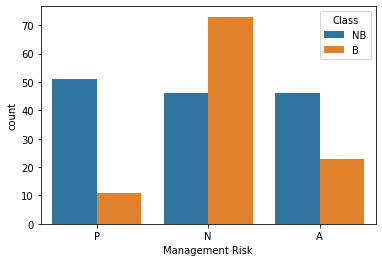

In [9]:
#Management Risk
sns.countplot(bank_df["Management Risk"],hue=bank_df["Class"])

#More negative cases overall
#Negative risk again indicates clearly more bankruptcy cases
#Positive risk category lead to least distribution of bankruptcy cases

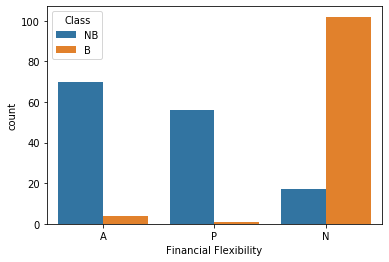

In [10]:
#Financial Flexibility
sns.countplot(bank_df["Financial Flexibility"],hue=bank_df["Class"])

#Again negative risk is higher overall and causes almost bankruptcy mostly

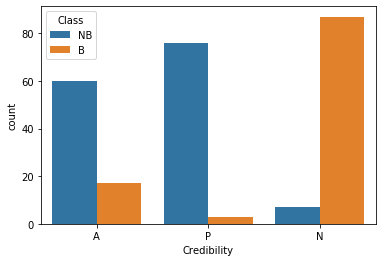

In [11]:
#Credibility
sns.countplot(bank_df["Credibility"],hue=bank_df["Class"])

#Again as expected negative credibilily has more bankrutcy cases

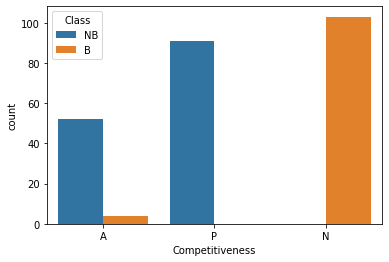

In [12]:
#Competitiveness
sns.countplot(bank_df["Competitiveness"],hue=bank_df["Class"])

#Again clear relation on the bankruptcy cases and competitiveness

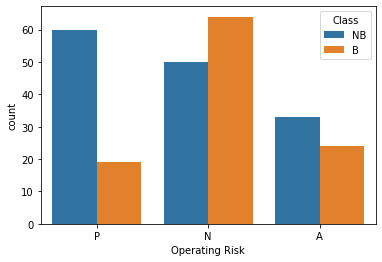

In [13]:
#Operating Risk
sns.countplot(bank_df["Operating Risk"],hue=bank_df["Class"])

#Again just like other features negative value show more bankruptcy tendencies

### Separate the dependant variable from the rest of the train data

In [14]:
#Except Class keep everything as the independent data
bank_df_labels = bank_df["Class"]

#sanity
bank_df_labels.sample(5)

181     B
243     B
72     NB
75     NB
134    NB
Name: Class, dtype: object

In [15]:
#Independent features
bank_df.drop("Class",axis=1,inplace=True)

#sanity
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 6 columns):
Industrial Risk          250 non-null object
Management Risk          250 non-null object
Financial Flexibility    250 non-null object
Credibility              250 non-null object
Competitiveness          250 non-null object
Operating Risk           250 non-null object
dtypes: object(6)
memory usage: 11.8+ KB


### Encode independent features.

In [16]:
#Since all the features are categorical values lets encode the independent features
#We will use Onehotencoding for these features

In [17]:
#import OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

#Since the # of records is small we will not go for sparse representation. This will ease some of the remaining steps
ohe = OneHotEncoder(sparse=False)

In [18]:
#Encode only the independent features
bank_df = ohe.fit_transform(bank_df)

In [19]:
#sanity
bank_df[0]

array([0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0.,
       1.])

In [20]:
#Get column names
column_names = ohe.get_feature_names(["Industrial Risk","Management Risk","Financial Flexibility",\
                                     "Credibility","Competitiveness","Operating Risk"])

In [21]:
#Convert to DF with column names derived from original names
bank_enc_df = pd.DataFrame(bank_df,columns=column_names)
bank_enc_df.head(3)

,Industrial Risk_A,Industrial Risk_N,Industrial Risk_P,Management Risk_A,Management Risk_N,Management Risk_P,Financial Flexibility_A,Financial Flexibility_N,Financial Flexibility_P,Credibility_A,Credibility_N,Credibility_P,Competitiveness_A,Competitiveness_N,Competitiveness_P,Operating Risk_A,Operating Risk_N,Operating Risk_P
0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [22]:
#We should have 3 times more features now
bank_enc_df.shape

(250, 18)

In [23]:
#Check the column datatypes
bank_enc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 18 columns):
Industrial Risk_A          250 non-null float64
Industrial Risk_N          250 non-null float64
Industrial Risk_P          250 non-null float64
Management Risk_A          250 non-null float64
Management Risk_N          250 non-null float64
Management Risk_P          250 non-null float64
Financial Flexibility_A    250 non-null float64
Financial Flexibility_N    250 non-null float64
Financial Flexibility_P    250 non-null float64
Credibility_A              250 non-null float64
Credibility_N              250 non-null float64
Credibility_P              250 non-null float64
Competitiveness_A          250 non-null float64
Competitiveness_N          250 non-null float64
Competitiveness_P          250 non-null float64
Operating Risk_A           250 non-null float64
Operating Risk_N           250 non-null float64
Operating Risk_P           250 non-null float64
dtypes: float64(18)
memory usag

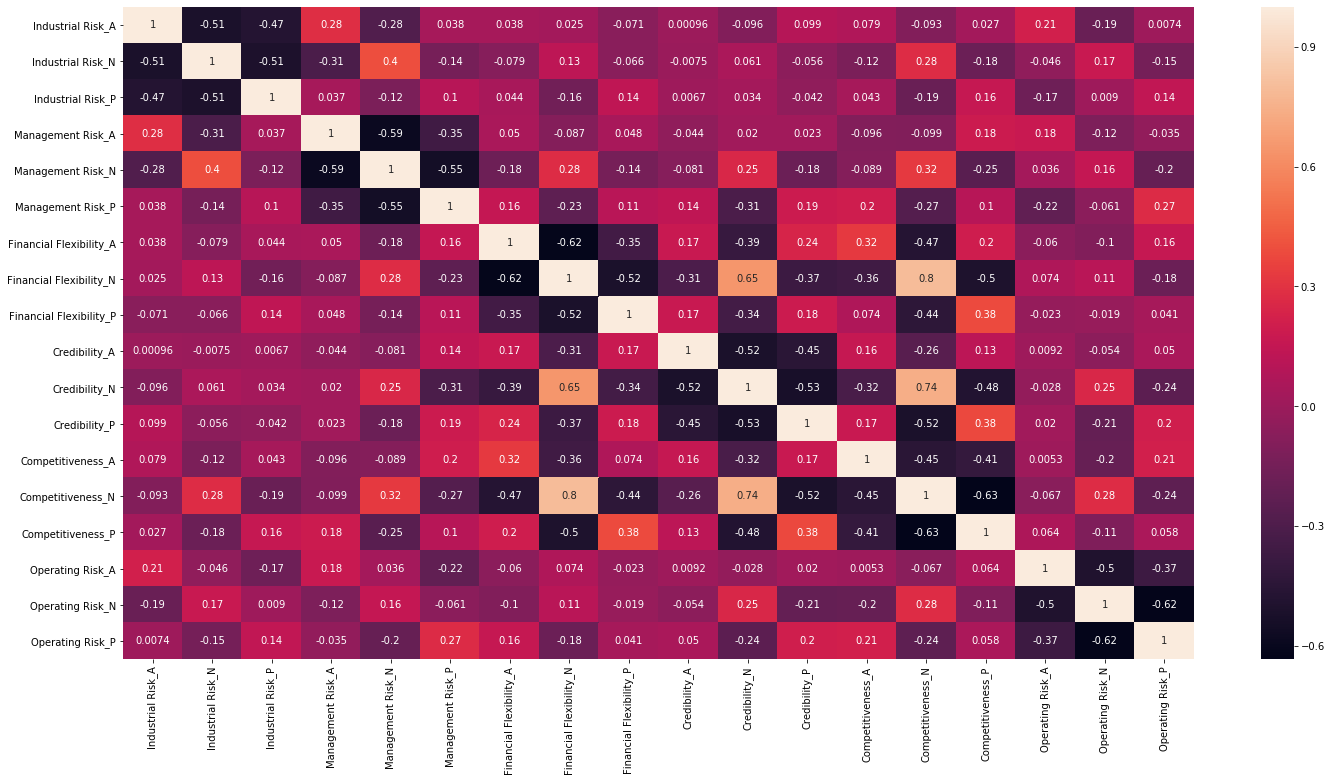

In [24]:
#Check correlation among these features
plt.figure(figsize=(24,12))
sns.heatmap(bank_enc_df.corr(),annot=True)

#There is some correlation among certain features but nothing very high
#For example credibility N with competiveness N and Financial Flexibility N
#In addition we can also see the correlation between the encoded features from the original features

### Split the dataset into training and test data ( Take 80:20 ratio)

In [25]:
#import needed libs
from sklearn.model_selection import train_test_split

In [26]:
#We will use test split as 20%
#Initialize seed value for repeatability
split = 0.2
seed = 10
X_train,X_test,y_train,y_test = train_test_split(bank_enc_df,bank_df_labels,test_size=split,random_state=seed)

#Sanity
print("Training set shape : ",X_train.shape)
print("Test set shape : ",X_test.shape)
print("Training Labels :",y_train.shape)
print("Test Labels :",y_test.shape)

Training set shape :  (200, 18)
Test set shape :  (50, 18)
Training Labels : (200,)
Test Labels : (50,)


### Apply PCA on the independent features of train data

In [27]:
#Lets import needed libs for PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [28]:
#Use standard scaler to scale and center the features before PCA
sc = StandardScaler()
X_train = sc.fit_transform(X_train)

#sanity
X_train[0]

array([-0.67028006,  1.29099445, -0.67812537, -0.62360956,  1.05131497,
       -0.56965192, -0.63910148,  1.06191317, -0.56195149, -0.69388867,
        1.27733275, -0.64686916, -0.55424682,  1.19959343, -0.74188112,
       -0.53881591,  1.06191317, -0.66245673])

In [29]:
#Lets fit the training dataset on PCA
#We will first start without mentioning the # of PCA components
pca = PCA()

#Use fit to generate PCA
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [30]:
#Check the pca components and variance
pca.components_

#We got 18 components as expected since there were 18 features 

array([[-4.95595317e-02,  1.65587829e-01, -1.23233494e-01,
        -6.66140201e-02,  2.27718065e-01, -1.94860481e-01,
        -2.61979926e-01,  4.13036582e-01, -2.04338846e-01,
        -1.80404621e-01,  3.87152590e-01, -2.26780558e-01,
        -2.02759365e-01,  4.30467995e-01, -2.62790519e-01,
         3.03941654e-02,  1.36473069e-01, -1.75509037e-01],
       [ 4.67446199e-01, -4.40165787e-01, -6.66578634e-03,
         4.83031742e-01, -3.29463294e-01, -1.21731385e-01,
        -7.45535019e-02,  1.33919713e-01, -7.72909711e-02,
        -7.75791398e-02,  1.41654235e-01, -7.10918589e-02,
         1.71225701e-04,  4.00524241e-02, -4.13190494e-02,
         3.15751715e-01, -2.59574200e-01, -4.99354124e-03],
       [-1.28953573e-01, -1.06674713e-01,  2.39569485e-01,
         2.25562663e-01, -1.87572513e-01, -1.76904455e-02,
        -2.72867660e-01, -4.35607615e-02,  3.40819199e-01,
        -1.03859545e-01,  8.69107032e-02,  1.41651663e-02,
        -4.34717774e-01, -3.21870422e-02,  4.18275675e

In [31]:
#Check explained variance
exp_var = pca.explained_variance_ratio_
exp_var

array([2.51309059e-01, 1.20463256e-01, 1.07323427e-01, 9.64756917e-02,
       8.27024963e-02, 7.72530008e-02, 6.71739284e-02, 6.01560624e-02,
       5.50075024e-02, 4.68961321e-02, 2.34011075e-02, 1.18383369e-02,
       7.19150534e-33, 5.20556277e-33, 2.89847657e-33, 1.68303249e-33,
       1.08020647e-33, 1.66917569e-34])

In [32]:
#Get the cumulative variances
cumvar = np.cumsum(exp_var)
cumvar

array([0.25130906, 0.37177231, 0.47909574, 0.57557143, 0.65827393,
       0.73552693, 0.80270086, 0.86285692, 0.91786442, 0.96476056,
       0.98816166, 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        ])

### Display elbow plot to find out reduced number of dimensions (which covers more than 95% of the variance)

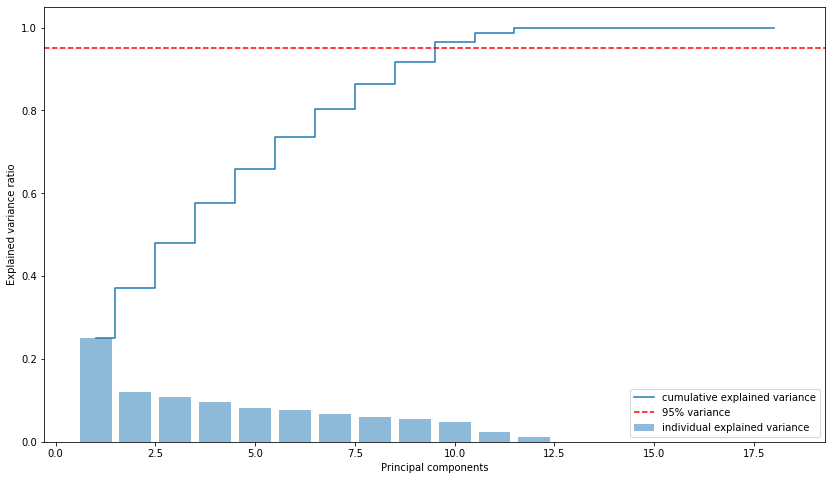

In [33]:
#Visualize the explained variance vs cumaltive variance
plt.figure(figsize=(14,8))
plt.bar(range(1, exp_var.size + 1), exp_var, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,cumvar.size + 1),cumvar, where= 'mid', label='cumulative explained variance')
plt.axhline(y=0.95,color="r",linestyle="--",label="95% variance")
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.show()

In [34]:
#Looks like we will need only 10 components to explain 95% variance
#Lets check that from the array as well
n_comp = np.argmax(cumvar >= 0.95) + 1
n_comp

10

In [35]:
#Lets use only these 10 components going forward
pca = PCA(n_components=n_comp)

In [36]:
#Use fit to generate PCA components
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [37]:
#We will get 10 components now
pca.components_

array([[-4.95595317e-02,  1.65587829e-01, -1.23233494e-01,
        -6.66140201e-02,  2.27718065e-01, -1.94860481e-01,
        -2.61979926e-01,  4.13036582e-01, -2.04338846e-01,
        -1.80404621e-01,  3.87152590e-01, -2.26780558e-01,
        -2.02759365e-01,  4.30467995e-01, -2.62790519e-01,
         3.03941654e-02,  1.36473069e-01, -1.75509037e-01],
       [ 4.67446199e-01, -4.40165787e-01, -6.66578634e-03,
         4.83031742e-01, -3.29463294e-01, -1.21731385e-01,
        -7.45535019e-02,  1.33919713e-01, -7.72909711e-02,
        -7.75791398e-02,  1.41654235e-01, -7.10918589e-02,
         1.71225701e-04,  4.00524241e-02, -4.13190494e-02,
         3.15751715e-01, -2.59574200e-01, -4.99354124e-03],
       [-1.28953573e-01, -1.06674713e-01,  2.39569485e-01,
         2.25562663e-01, -1.87572513e-01, -1.76904455e-02,
        -2.72867660e-01, -4.35607615e-02,  3.40819199e-01,
        -1.03859545e-01,  8.69107032e-02,  1.41651663e-02,
        -4.34717774e-01, -3.21870422e-02,  4.18275675e

In [38]:
#Explained variance of the 10 components
pca.explained_variance_ratio_

array([0.25130906, 0.12046326, 0.10732343, 0.09647569, 0.0827025 ,
       0.077253  , 0.06717393, 0.06015606, 0.0550075 , 0.04689613])

### Transform the data using PCA ( select optimum number of PCs)

In [39]:
#Project training data into the new 10 components
X_train_new = pca.transform(X_train)

In [40]:
#Map the components to the features
pca_feat = pd.DataFrame(pca.components_,columns=column_names)
pca_feat

,Industrial Risk_A,Industrial Risk_N,Industrial Risk_P,Management Risk_A,Management Risk_N,Management Risk_P,Financial Flexibility_A,Financial Flexibility_N,Financial Flexibility_P,Credibility_A,Credibility_N,Credibility_P,Competitiveness_A,Competitiveness_N,Competitiveness_P,Operating Risk_A,Operating Risk_N,Operating Risk_P
0,-0.049560,0.165588,-0.123233,-0.066614,0.227718,-0.194860,-0.261980,0.413037,-0.204339,-0.180405,0.387153,-0.226781,-0.202759,0.430468,-0.262791,0.030394,0.136473,-0.175509
1,0.467446,-0.440166,-0.006666,0.483032,-0.329463,-0.121731,-0.074554,0.133920,-0.077291,-0.077579,0.141654,-0.071092,0.000171,0.040052,-0.041319,0.315752,-0.259574,-0.004994
2,-0.128954,-0.106675,0.239569,0.225563,-0.187573,-0.017690,-0.272868,-0.043561,0.340819,-0.103860,0.086911,0.014165,-0.434718,-0.032187,0.418276,-0.151512,0.386922,-0.282020
3,0.138813,0.291270,-0.441773,0.049142,0.259464,-0.352567,-0.079578,-0.089404,0.189029,-0.137877,-0.175436,0.328329,-0.061347,-0.133701,0.191781,0.400910,-0.087488,-0.268779
4,-0.094966,-0.036402,0.132491,-0.023672,0.181899,-0.186490,-0.229728,-0.040502,0.291411,0.612570,-0.090657,-0.532645,0.074452,-0.045199,-0.019513,0.254292,-0.121097,-0.099366
5,-0.365037,-0.013040,0.377038,-0.017456,0.154490,-0.161155,-0.231212,0.099375,0.129524,-0.274390,0.092938,0.182892,-0.095394,-0.018808,0.103858,0.130497,-0.505198,0.429295
6,-0.220517,-0.193545,0.421272,0.109283,0.222265,-0.372160,0.367689,-0.125721,-0.243737,-0.149365,0.112415,0.033756,0.264722,-0.156177,-0.074040,0.155235,0.198440,-0.355912
7,0.003065,-0.075025,0.075141,-0.156157,-0.099307,0.278329,-0.373188,-0.024707,0.425373,-0.248932,0.092341,0.157381,0.483487,-0.040850,-0.386419,0.127250,0.099828,-0.223631
8,-0.080335,0.218518,-0.147757,0.498878,-0.069004,-0.440693,-0.047675,-0.145212,0.220351,0.000404,0.022540,-0.024404,0.245855,0.031458,-0.250180,-0.436811,0.111397,0.275422
9,0.465188,-0.460060,0.016316,-0.302030,0.470454,-0.230935,-0.123194,0.007245,0.122423,-0.045927,-0.009679,0.057471,0.004459,-0.070186,0.068189,-0.339271,0.124243,0.173030


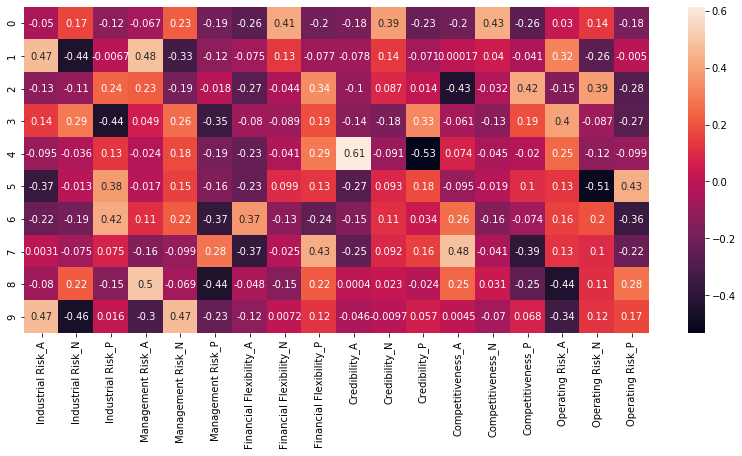

In [41]:
##Check the heatmap to see the influence of various features on the PCs
plt.figure(figsize=(14,6))
sns.heatmap(pca_feat,annot=True)

### Apply KMeans algorithm on the above transformed data

In [42]:
##We will use this transformed dataset for our KMeans clustering

In [43]:
#Import KMeans
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [44]:
##We will initialize cluster_error to capture the errors(inertia) for the different range of k values
cluster_errors = []

In [45]:
##We will iterate for k values from 1 to 10 and try to capture the intertia data
#We will also capture the silhouette scores
cluster_range = range(1, 11)
for num_clusters in cluster_range:
  kmean = KMeans(n_clusters=num_clusters,n_init = 15, random_state=10)
  kmean.fit(X_train_new)
  cluster_errors.append(kmean.inertia_)

#Store the cluster range value and the inertia in a dataframe for plotting later
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
print("Cluster Range and the Error values:\n",clusters_df)

Cluster Range and the Error values:
    num_clusters  cluster_errors
0             1     3473.138000
1             2     2659.799607
2             3     2365.933529
3             4     2189.979199
4             5     2026.010757
5             6     1887.484467
6             7     1746.802059
7             8     1679.701209
8             9     1589.617736
9            10     1518.696486


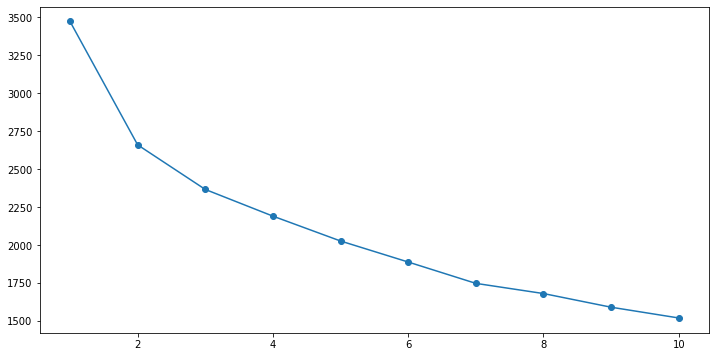

In [46]:
# Elbow plot

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [47]:
#Based on the elbow the best cluster is probably 2 but we need to check on 3 as well
#Lets use silhouette scores and check

In [48]:
silhouette_vals = []
cluster_range = range(2, 11)

In [49]:
for num_clusters in cluster_range:
  kmean = KMeans(n_clusters=num_clusters,n_init = 15, random_state=10)
  kmean.fit(X_train_new)
  silhouette_vals.append(silhouette_score(X_train_new,kmean.labels_))

#Store the cluster range value and the silhouette values in a dataframe for plotting later
silhouette_df = pd.DataFrame( { "num_clusters":cluster_range, "silhouette_scores": silhouette_vals } )
print("Cluster Range and the silhouette values:\n",silhouette_df)

##3 seems to be better but not by much
#generally the scores seem to be on the lower side

Cluster Range and the silhouette values:
    num_clusters  silhouette_scores
0             2           0.225207
1             3           0.233793
2             4           0.227449
3             5           0.183986
4             6           0.178824
5             7           0.222484
6             8           0.203096
7             9           0.223240
8            10           0.227145


Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.22520676971922896


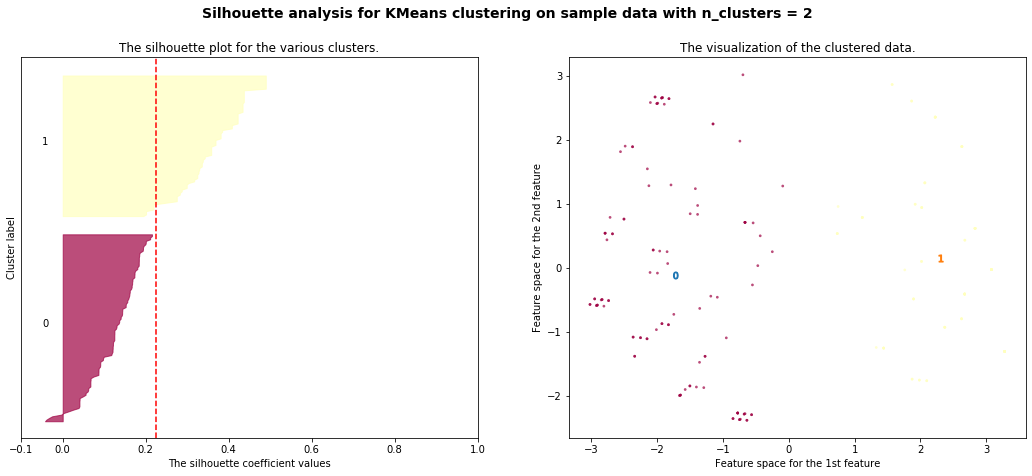

For n_clusters = 3 The average silhouette_score is : 0.23379302535866323


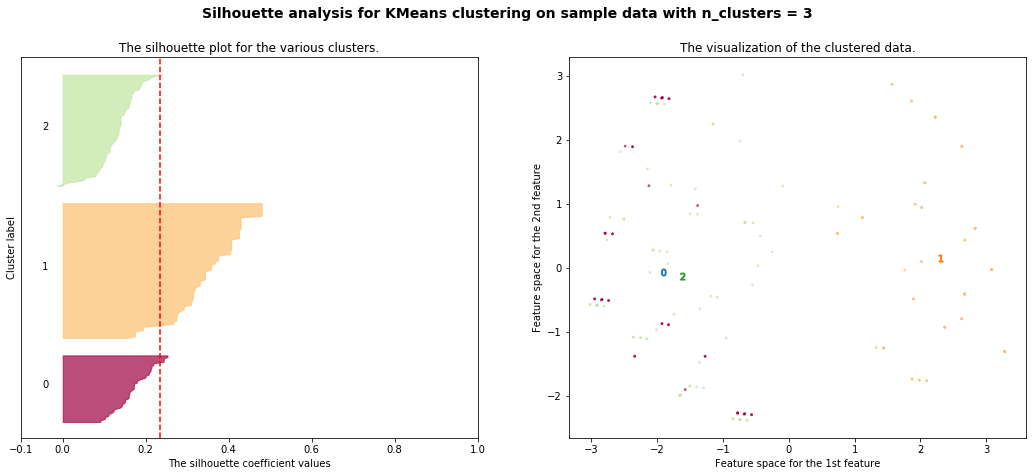

For n_clusters = 4 The average silhouette_score is : 0.22744949778867998


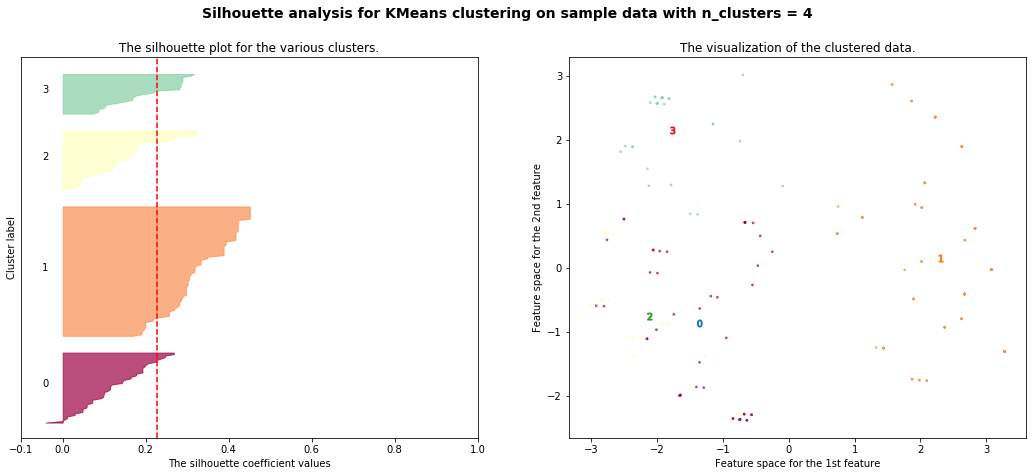

For n_clusters = 5 The average silhouette_score is : 0.18248834458807764


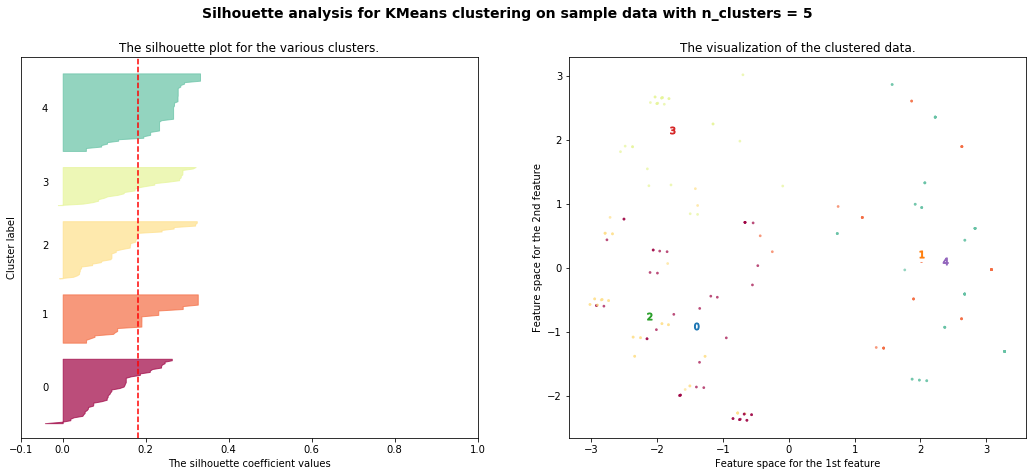

For n_clusters = 6 The average silhouette_score is : 0.17882409075867134


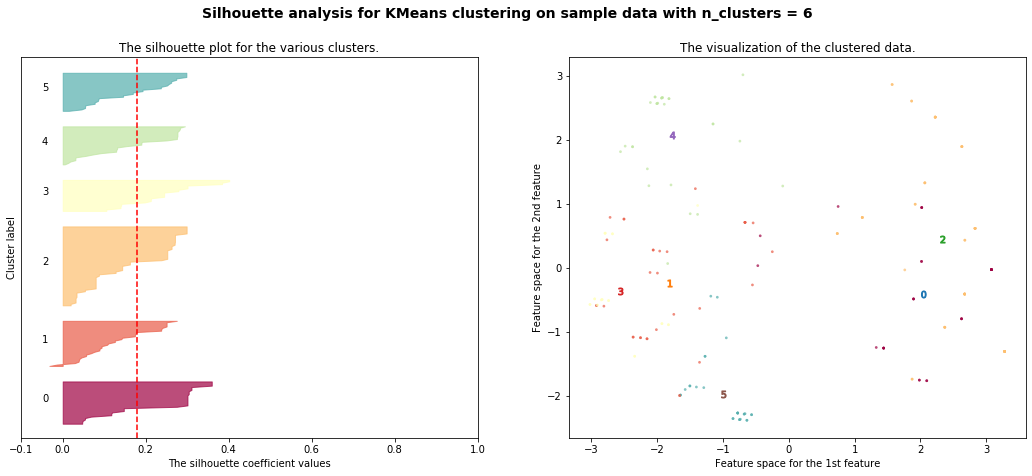

For n_clusters = 7 The average silhouette_score is : 0.22248360901700046


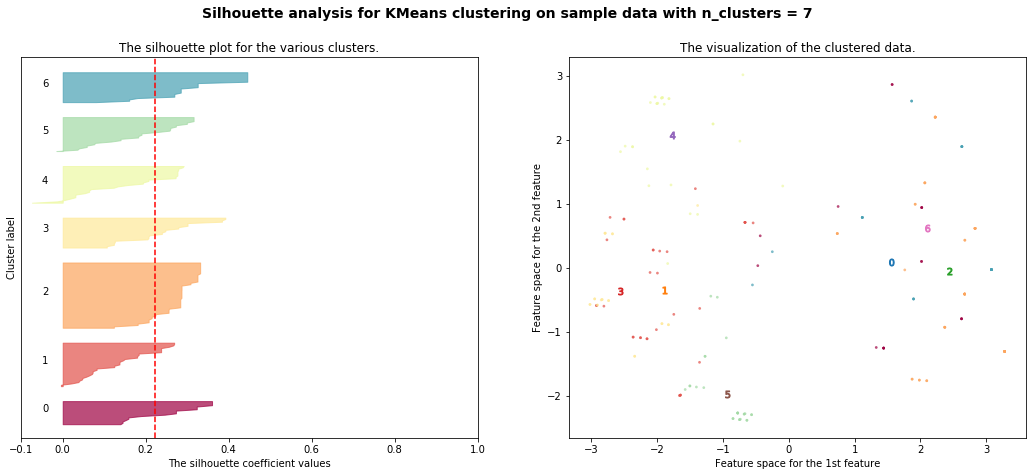

For n_clusters = 8 The average silhouette_score is : 0.20309623326090326


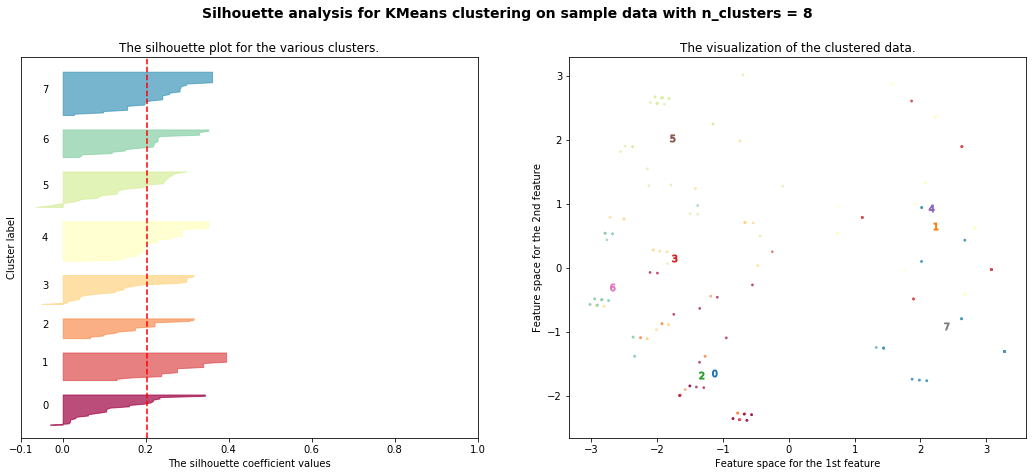

For n_clusters = 9 The average silhouette_score is : 0.22323962585724047


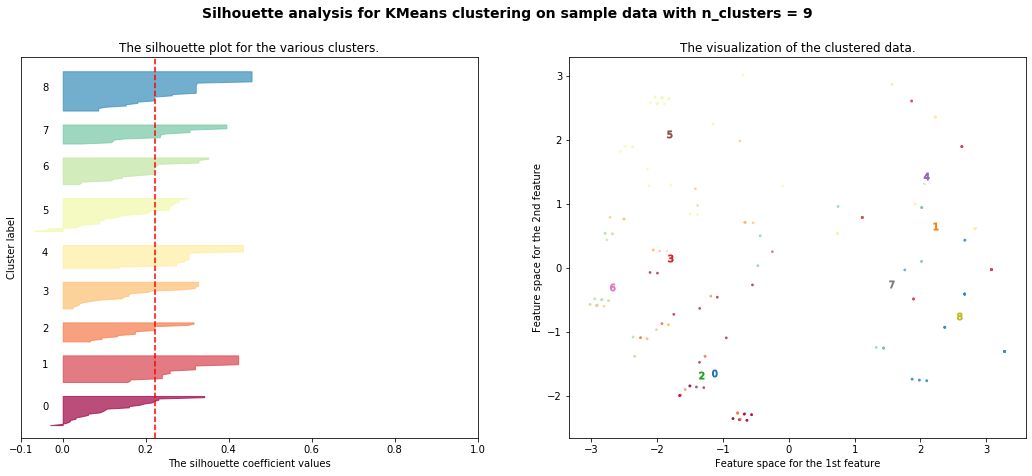

For n_clusters = 10 The average silhouette_score is : 0.22714503507107317


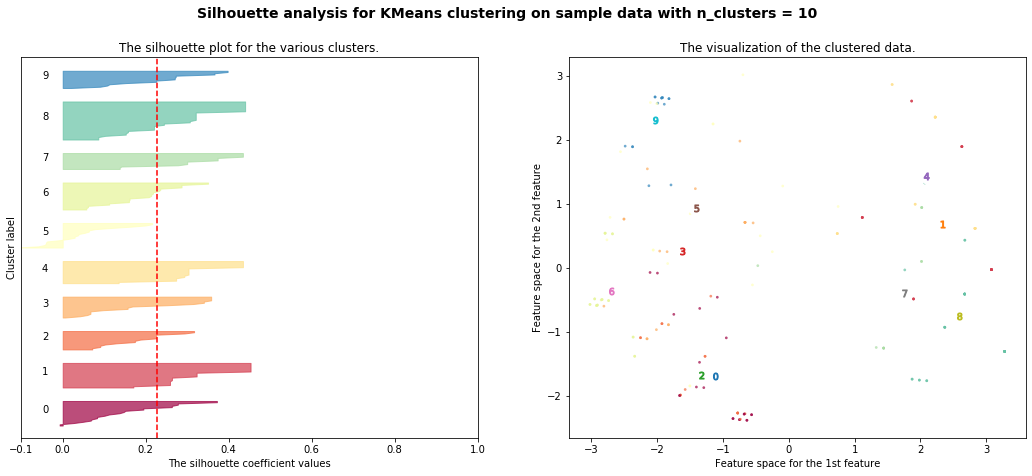

In [50]:
#Lets plot the silsilhouette scores

#Code from sklearn user guide


## from __future__ import print_function
%matplotlib inline


from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X=X_train_new

range_n_clusters = [2, 3, 4, 5, 6,7,8,9,10]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.Spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.Spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors)

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1],
                marker='o', c="white", alpha=1, s=200)

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

In [51]:
#Based on the elbow method and silhouette scores lets go with cluster size of 2 for now.
#Not much difference among 2 and 3 clusters and based on problem domain we can go with 2 clusters
#Even though the clusters are not very good based on the PCA features reading the silhouette scores

### Select optimal number of clusters and form clusters out of the train data

In [52]:
#Rebuild clusters with 2 clusters
kmean = KMeans(n_clusters=2,random_state=10,n_init=15)

In [53]:
#Get the data fit on 2 clusters
kmean.fit(X_train_new)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=15, n_jobs=None, precompute_distances='auto',
       random_state=10, tol=0.0001, verbose=0)

In [54]:
#Cluster Centers
kmean.cluster_centers_

array([[-1.7301011 , -0.11057863,  0.10073372,  0.20497683,  0.03344573,
        -0.03974284,  0.07243981, -0.01314334,  0.0422419 ,  0.0176735 ],
       [ 2.29338983,  0.14658097, -0.13353075, -0.27171347, -0.04433504,
         0.05268236, -0.09602486,  0.01742257, -0.05599508, -0.02342766]])

In [55]:
#Check the labels to see we have 2 distinct clusters
np.unique(kmean.labels_)

#As expected two new labels

array([0, 1])

### Create a new column in the train data and populate it with the cluster labels

In [56]:
#Get the cluster labels as a new column and join with original training data
train_labels = pd.DataFrame(kmean.labels_,columns=["ClusterLabel"])
train_labels.head(3)

,ClusterLabel
0,1
1,0
2,1


In [57]:
#Join labels to the training data and create a labelled training dataset
X_train_clustered = pd.DataFrame(X_train_new).join(train_labels)

In [58]:
#Sanity check
X_train_clustered.head(5)

,0,1,2,3,4,5,6,7,8,9,ClusterLabel
0,3.278314,-1.305113,0.140363,0.134896,-0.298005,-0.329339,0.067378,0.001959,0.358556,-0.039488,1
1,-2.057609,0.277154,2.031930,-0.070149,-1.709765,-0.082770,2.239813,-1.172786,0.337512,-0.523673,0
2,3.278314,-1.305113,0.140363,0.134896,-0.298005,-0.329339,0.067378,0.001959,0.358556,-0.039488,1
3,-1.958710,0.260481,3.431292,0.547830,-0.521162,0.730051,0.858800,0.645641,0.958523,0.034471,0
4,-3.016962,-0.572442,0.100645,-1.407848,-2.063842,1.526047,-0.039524,-0.863593,-1.423221,-0.261063,0


###  Transform the test data using the same PCA object that was fit on the train data

In [59]:
#Lets transform test dataset also using the same PCA transform
#First apply scaling
X_test = sc.transform(X_test)

In [60]:
#sanity
X_test[0]

array([ 1.49191369, -0.77459667, -0.67812537, -0.62360956, -0.95118973,
        1.75545796, -0.63910148, -0.94169658,  1.77951304, -0.69388867,
       -0.78288136,  1.54590766, -0.55424682, -0.83361577,  1.34792485,
       -0.53881591, -0.94169658,  1.50953255])

In [61]:
#Transform using PCA
X_test_new = pca.transform(X_test)

### Use the same kmeans object, assign cluster labels to the test data and store it as a feature

In [62]:
#Predict the cluster labels of test data
test_labels = kmean.predict(X_test_new)
test_labels = pd.DataFrame(test_labels,columns=["ClusterLabel"])
test_labels.head(3)

,ClusterLabel
0,0
1,0
2,0


In [63]:
#Join labels to the test data and create a labelled test dataset
X_test_clustered = pd.DataFrame(X_test_new).join(test_labels)

In [64]:
#Sanity check
X_test_clustered.head(3)

,0,1,2,3,4,5,6,7,8,9,ClusterLabel
0,-2.759926,0.435944,0.705443,0.461310,-1.365798,0.737907,-2.804243,0.799700,-0.657822,1.267784,0
1,-2.100124,2.578441,0.099294,2.316395,-1.348729,-0.359004,0.830257,-1.223205,-0.787344,-0.614370,0
2,-2.100124,2.578441,0.099294,2.316395,-1.348729,-0.359004,0.830257,-1.223205,-0.787344,-0.614370,0


###  Apply SVC model on train dataset and predict target for test dataset.

In [65]:
#Lets import required libs for SVC
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score

In [66]:
#Initialize SVC..we will start with C = 0.1
svc = SVC(C=0.1)

In [68]:
#Check again the shapes of datasets
print("Training Data Set :",X_train_clustered.shape)
print("Training Target Data Set :",y_train.shape)
print("Test Data Set :",X_test_clustered.shape)
print("Test Target Data Set :",y_test.shape)

Training Data Set : (200, 11)
Training Target Data Set : (200,)
Test Data Set : (50, 11)
Test Target Data Set : (50,)


In [69]:
#Fit the model
svc.fit(X_train_clustered,y_train)

SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [70]:
#Get the predictions to use later in metrics
y_train_pred = svc.predict(X_train_clustered)

y_pred = svc.predict(X_test_clustered)

### Check accuracy and confusion matrix

In [72]:
#Get the training and test accuracy
print("Training Accuracy Score :",accuracy_score(y_train,y_train_pred))
print("Test Accuracy Score :",accuracy_score(y_test,y_pred))

print("Confusion matrix: \n",confusion_matrix(y_test,y_pred))
print("Classification Metrics : \n",classification_report(y_test,y_pred))

Training Accuracy Score : 0.99
Test Accuracy Score : 1.0
Confusion matrix: 
 [[21  0]
 [ 0 29]]
Classification Metrics : 
               precision    recall  f1-score   support

           B       1.00      1.00      1.00        21
          NB       1.00      1.00      1.00        29

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



In [73]:
##Lets join the training and test to do a cross validation
X_full_clustered = pd.concat([X_train_clustered,X_test_clustered],ignore_index=True)

In [74]:
#Sanity
X_full_clustered.sample(10)

,0,1,2,3,4,5,6,7,8,9,ClusterLabel
85,-1.917043,2.655448,-2.052907,0.756597,1.343480,-1.787910,1.216415,-0.151945,0.369707,-0.970433,0
163,-0.563930,-2.292914,-0.334979,0.950846,2.227606,-1.189227,0.139963,1.549094,1.635760,0.307750,0
206,3.077661,-0.028885,-0.997710,1.270260,0.553589,0.995386,0.041528,0.106675,-0.910689,-1.100887,1
5,2.224752,2.350348,0.959870,-0.576739,-0.845123,-1.439928,-0.211332,0.014631,0.982758,0.301873,1
21,-1.182996,-0.443082,0.106579,0.576836,0.692486,-2.322362,0.664885,-2.055578,-0.712995,1.837713,0
29,2.670983,-0.410261,0.876450,-1.417788,0.062410,0.509276,1.374069,0.318692,-0.410902,0.945931,1
135,-3.016962,-0.572442,0.100645,-1.407848,-2.063842,1.526047,-0.039524,-0.863593,-1.423221,-0.261063,0
19,2.066615,1.325288,1.754432,-1.827919,-0.354565,0.161032,1.172373,0.169766,0.838369,-0.668829,1
214,-1.571907,-1.899528,-1.399858,-1.006468,0.241142,-2.686119,0.210576,0.576675,0.128271,-1.729431,0
30,1.894873,-0.486358,-1.398509,1.337321,2.048226,0.218079,-0.508969,-0.615048,-0.956264,-1.179002,1


In [75]:
#Lets join the labels now
y_full = pd.concat([y_train,y_test],ignore_index=True)

In [76]:
#Sanity
y_full.sample(10)

175    NB
240    NB
70      B
16     NB
47      B
224    NB
84      B
191     B
125    NB
26     NB
Name: Class, dtype: object

In [77]:
##Lets get the cross validated scores
rskfold = RepeatedStratifiedKFold(n_splits=10,random_state=seed,n_repeats=10)
cv_accuracy = cross_val_score(svc,X_full_clustered,y_full,cv=rskfold,scoring="accuracy")
print("Cross Validation Accuracy Results: \n",cv_accuracy)

Cross Validation Accuracy Results: 
 [1.   0.96 0.96 1.   1.   1.   1.   1.   1.   1.   1.   0.96 1.   1.
 1.   1.   1.   1.   1.   0.96 1.   1.   0.96 1.   1.   1.   1.   1.
 1.   0.96 1.   1.   1.   1.   1.   1.   0.96 1.   1.   0.96 1.   1.
 1.   1.   1.   1.   0.96 1.   0.96 1.   1.   0.96 1.   1.   1.   1.
 1.   0.96 1.   1.   1.   1.   1.   0.96 0.96 1.   1.   1.   1.   1.
 1.   0.96 1.   1.   1.   1.   1.   0.96 1.   1.   1.   1.   1.   1.
 1.   1.   0.96 1.   0.96 1.   1.   1.   1.   1.   1.   1.   1.   1.
 0.92 1.  ]


In [78]:
#Get the average cross validated scores and std. deviation
print(f"Average cross validated accuracy score : {cv_accuracy.mean() : .3}")
print(f"Std. Deviation cross validated accuracy score : {cv_accuracy.std() : .3}")

Average cross validated accuracy score :  0.992
Std. Deviation cross validated accuracy score :  0.017


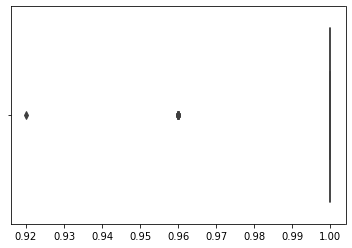

In [79]:
#Plot the results as a box plot to visualize the accuracy
sns.boxplot(cv_accuracy)

In [80]:
##Lets see if we can do some inverse mapping and see the relation between clusters and class (B,NB)

In [82]:
#Merge the dependent and independent features of the final transformed data
comp_df = X_full_clustered.join(y_full)

In [84]:
#Sanity
comp_df.head()

,0,1,2,3,4,5,6,7,8,9,ClusterLabel,Class
0,3.278314,-1.305113,0.140363,0.134896,-0.298005,-0.329339,0.067378,0.001959,0.358556,-0.039488,1,B
1,-2.057609,0.277154,2.031930,-0.070149,-1.709765,-0.082770,2.239813,-1.172786,0.337512,-0.523673,0,NB
2,3.278314,-1.305113,0.140363,0.134896,-0.298005,-0.329339,0.067378,0.001959,0.358556,-0.039488,1,B
3,-1.958710,0.260481,3.431292,0.547830,-0.521162,0.730051,0.858800,0.645641,0.958523,0.034471,0,NB
4,-3.016962,-0.572442,0.100645,-1.407848,-2.063842,1.526047,-0.039524,-0.863593,-1.423221,-0.261063,0,NB


In [85]:
#Check the datatypes now
comp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 12 columns):
0               250 non-null float64
1               250 non-null float64
2               250 non-null float64
3               250 non-null float64
4               250 non-null float64
5               250 non-null float64
6               250 non-null float64
7               250 non-null float64
8               250 non-null float64
9               250 non-null float64
ClusterLabel    250 non-null int32
Class           250 non-null object
dtypes: float64(10), int32(1), object(1)
memory usage: 22.5+ KB


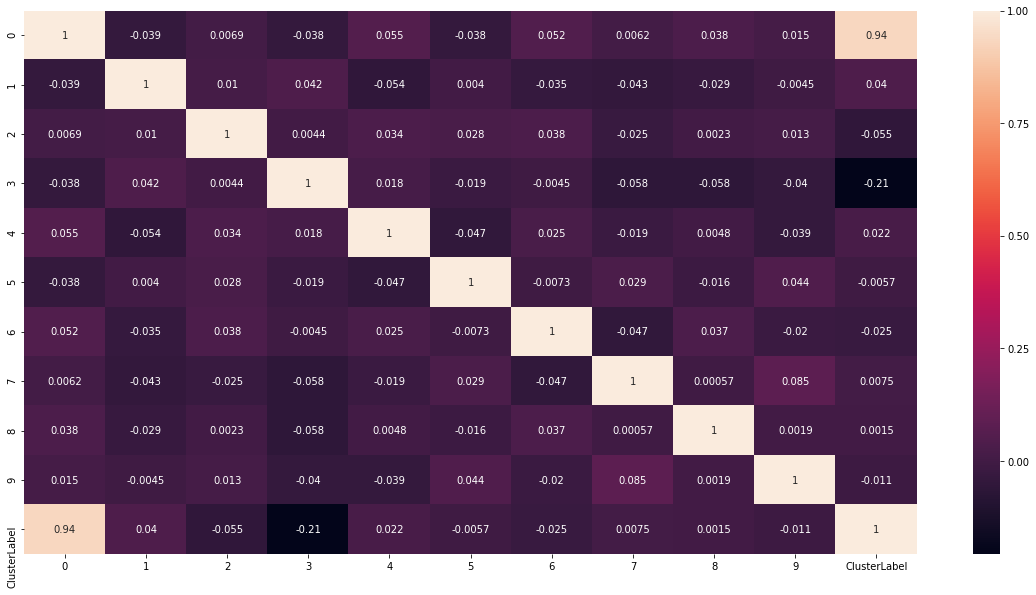

In [86]:
#Check the correlation 
plt.figure(figsize=(20,10))
sns.heatmap(comp_df.corr(),annot=True)

#We can see that PC 1 is highly correlated to Cluster Label and is probably the proxy for all the info

In [87]:
#Check cross tab to see the relation between cluster label and class label
pd.crosstab(comp_df.Class,comp_df.ClusterLabel)

#We can clearly see that the clusters have tried to map to the classes

ClusterLabel,0,1
Class,,
B,1,106
NB,142,1


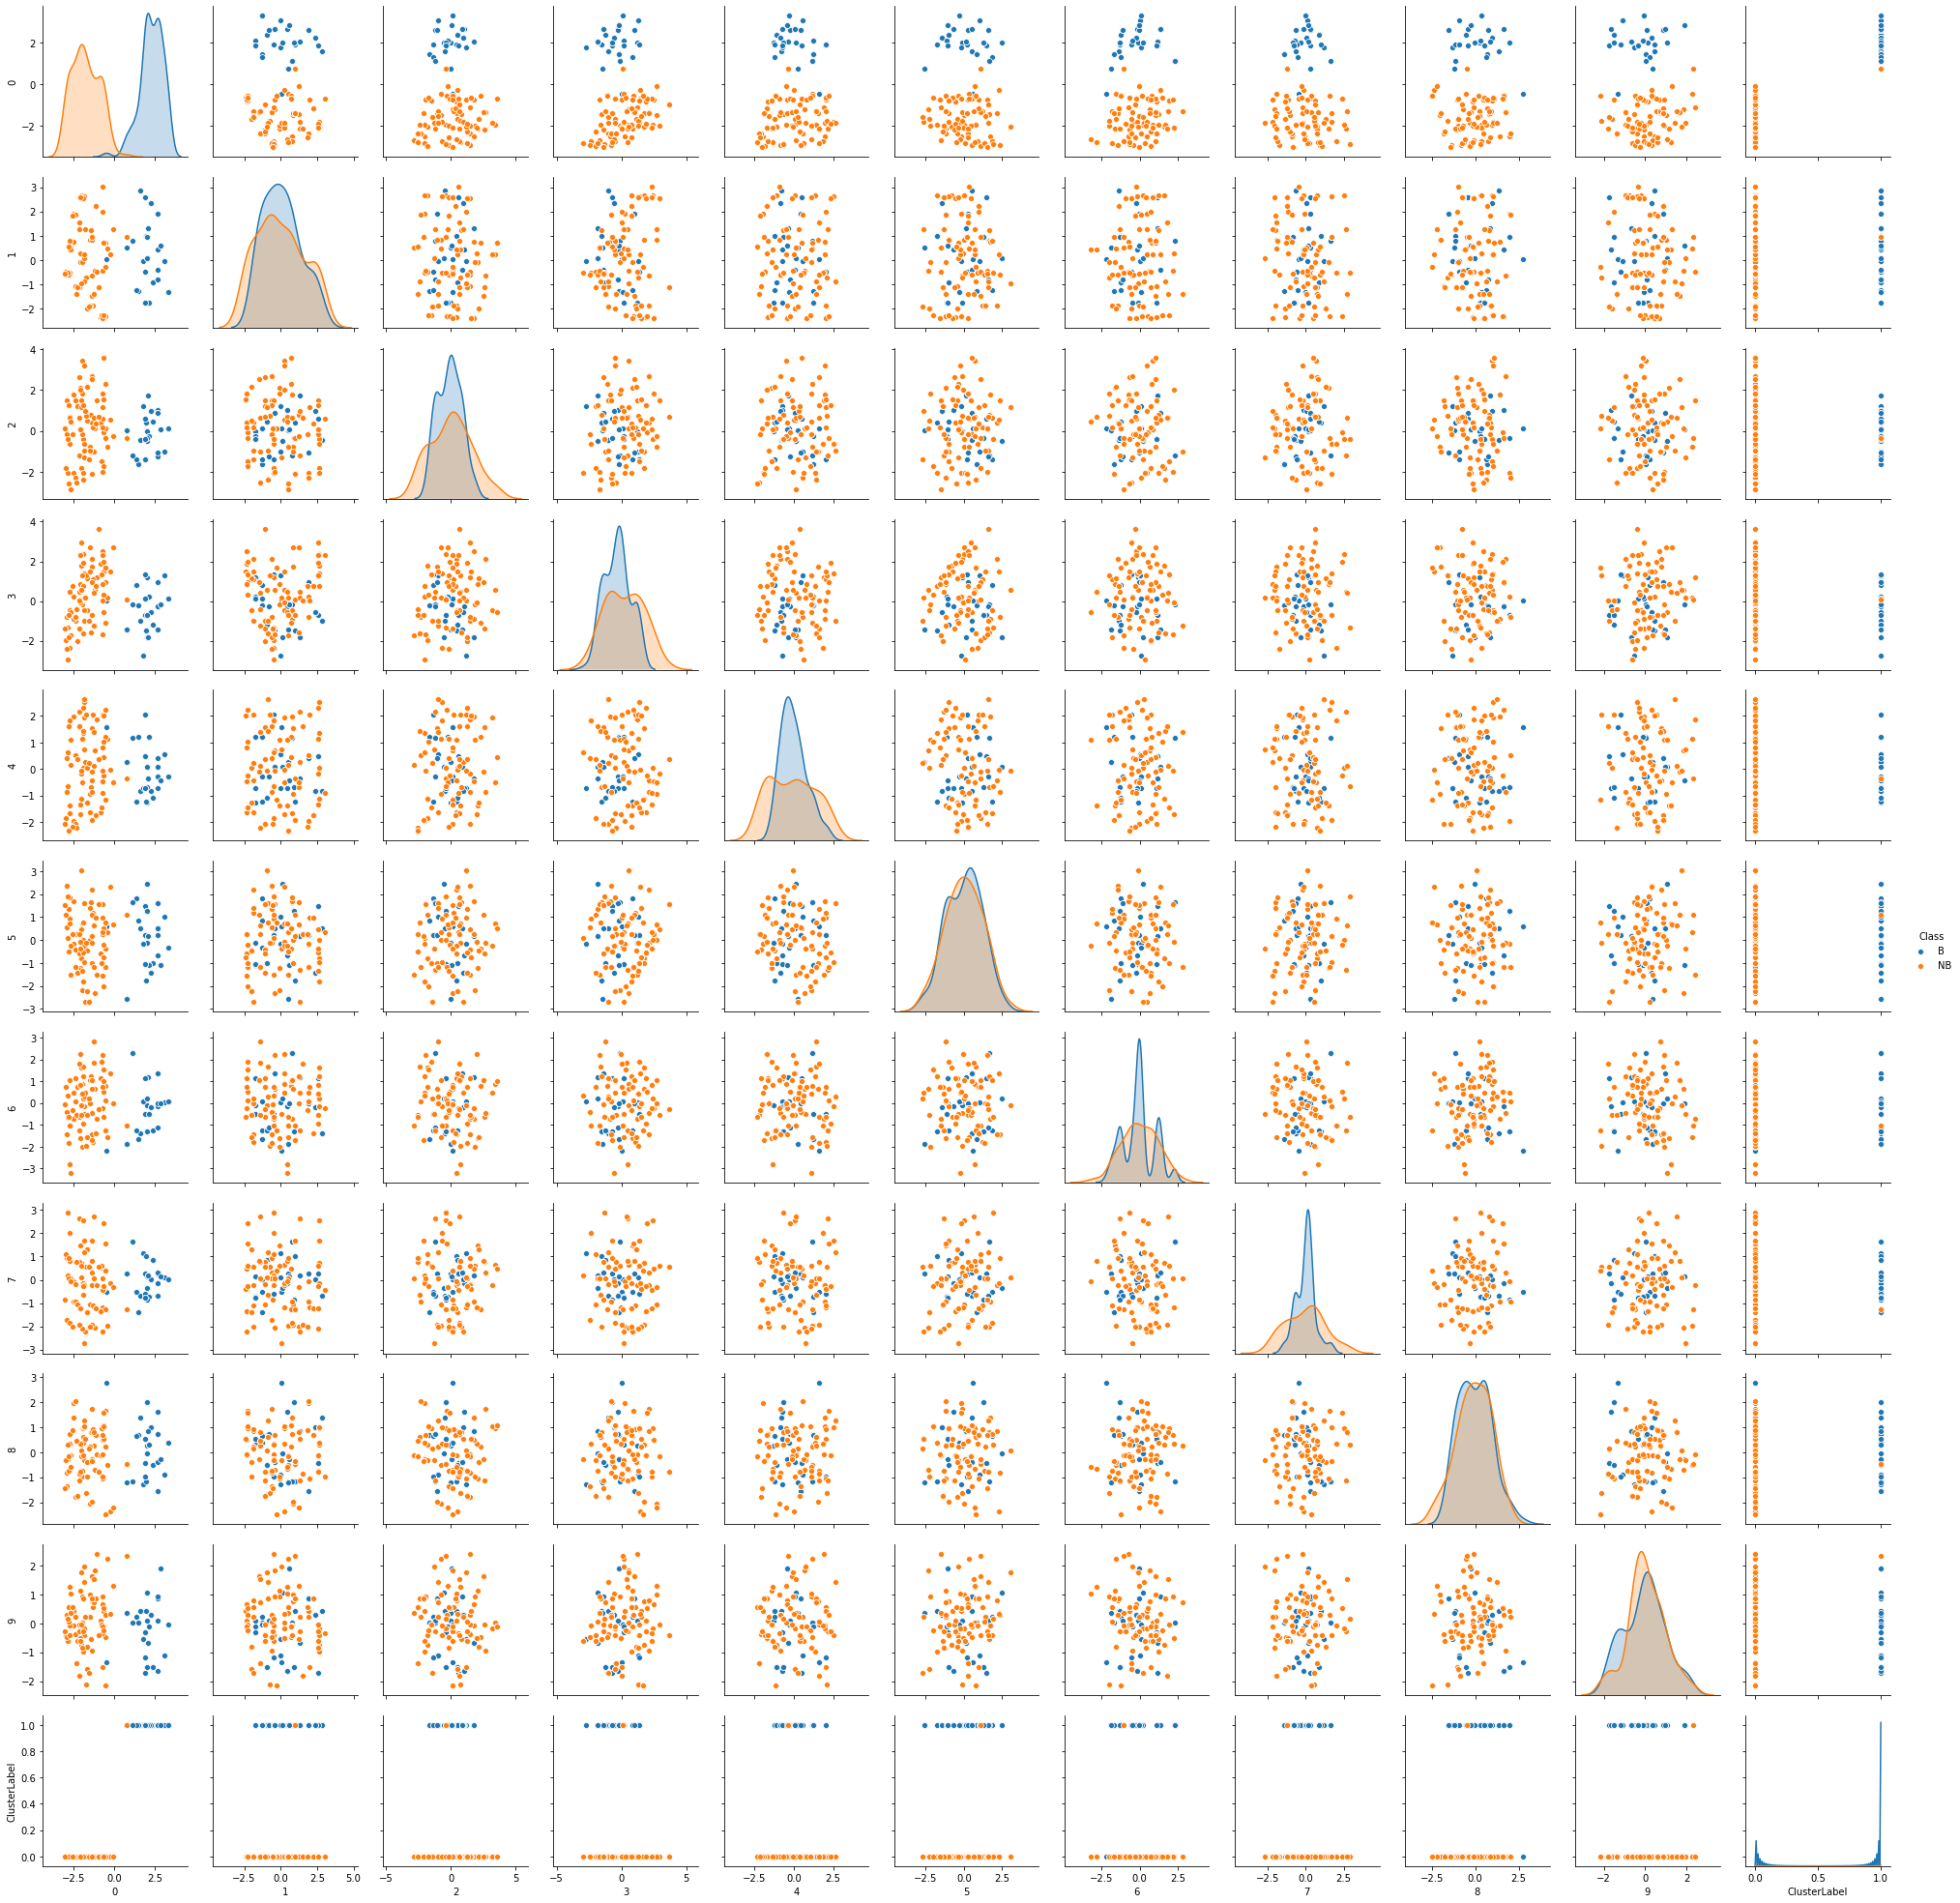

In [88]:
#Visualize the dataset
sns.pairplot(comp_df,hue="Class")

#We can again clearly see that the first PC has clearly seperated the classes as clusters

In [89]:
#Lets try to find the meaning of the clusters with the original features and see if it makes sense


In [91]:
#Lets get the cluster labels before performing inverse transforms
labels_df = X_full_clustered["ClusterLabel"]

#sanity
labels_df.head()

0    1
1    0
2    1
3    0
4    0
Name: ClusterLabel, dtype: int32

In [93]:
#Drop the cluster labels and start the inverse transforms
X_back = X_full_clustered.drop("ClusterLabel",axis=1)

X_back.head(2)

,0,1,2,3,4,5,6,7,8,9
0,3.278314,-1.305113,0.140363,0.134896,-0.298005,-0.329339,0.067378,0.001959,0.358556,-0.039488
1,-2.057609,0.277154,2.031930,-0.070149,-1.709765,-0.082770,2.239813,-1.172786,0.337512,-0.523673


In [94]:
#First go back to original components from PCA componenents
X_back = pca.inverse_transform(X_back)

In [95]:
X_back[0]

array([-0.68542152,  1.24010581, -0.6100132 , -0.59984045,  1.05156634,
       -0.59475807, -0.65416571,  1.07957855, -0.56659041, -0.6241256 ,
        1.08549381, -0.51433608, -0.618236  ,  1.35949474, -0.84953425,
       -0.5309092 ,  1.07975458, -0.68896876])

In [96]:
#Lets remove scaling
X_back = sc.inverse_transform(X_back)

In [97]:
X_back[0]

array([-0.00700282,  0.97536364,  0.03163918,  0.0106723 ,  1.00012553,
       -0.01079783, -0.00683557,  1.00881678, -0.00198121,  0.03267527,
        0.90688398,  0.06044075, -0.02713133,  1.07864479, -0.05151346,
        0.0033017 ,  1.00890464, -0.01220634])

In [98]:
#Lets remove encoding
X_back = ohe.inverse_transform(X_back)

In [99]:
X_back[0]

array(['N', 'N', 'N', 'N', 'N', 'N'], dtype=object)

In [100]:
#Convert to DF
X_back_df = pd.DataFrame(X_back,columns=["Industrial Risk","Management Risk","Financial Flexibility",\
                                         "Credibility","Competitiveness","Operating Risk"])

In [101]:
X_back_df.head(5)

,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk
0,N,N,N,N,N,N
1,P,A,A,P,P,N
2,N,N,N,N,N,N
3,P,A,P,P,P,N
4,P,P,A,P,P,P


In [102]:
#Join the cluster labels back
X_back_df = X_back_df.join(labels_df)

In [103]:
X_back_df.head(5)

,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk,ClusterLabel
0,N,N,N,N,N,N,1
1,P,A,A,P,P,N,0
2,N,N,N,N,N,N,1
3,P,A,P,P,P,N,0
4,P,P,A,P,P,P,0


In [104]:
#Join back the class labels
X_back_df = X_back_df.join(y_full)

In [105]:
X_back_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 8 columns):
Industrial Risk          250 non-null object
Management Risk          250 non-null object
Financial Flexibility    250 non-null object
Credibility              250 non-null object
Competitiveness          250 non-null object
Operating Risk           250 non-null object
ClusterLabel             250 non-null int32
Class                    250 non-null object
dtypes: int32(1), object(7)
memory usage: 14.7+ KB


In [106]:
#Sample
X_back_df.sample(10)

,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk,ClusterLabel,Class
53,A,A,A,P,A,A,0,NB
143,P,A,P,N,P,N,0,NB
117,P,A,A,A,P,A,0,NB
29,P,N,N,N,N,N,1,B
108,N,N,A,P,P,N,0,NB
48,N,N,A,P,P,N,0,NB
211,N,N,N,N,N,P,1,B
243,N,N,A,A,P,N,0,NB
47,N,N,N,N,N,N,1,B
240,A,A,A,P,P,A,0,NB


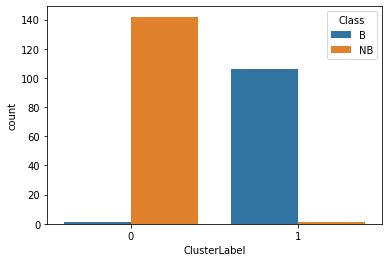

In [107]:
#Again we see the high correlation between cluster labels and class
sns.countplot(X_back_df["ClusterLabel"],hue=X_back_df["Class"])

In [114]:
#Lets visualize the cluster labels and class with various features to see if it makes sense

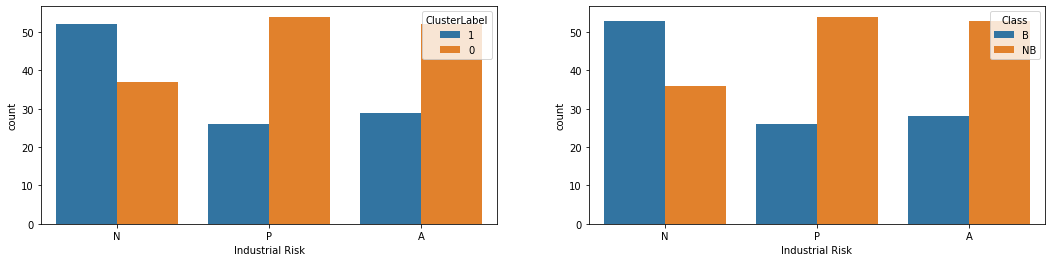

In [142]:
#Industrial Risk
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(18,4))
sns.countplot(X_back_df["Industrial Risk"],hue=X_back_df["ClusterLabel"],hue_order=[1,0],ax=ax1)
sns.countplot(X_back_df["Industrial Risk"],hue=X_back_df["Class"],ax=ax2)

#As expected they are very similar

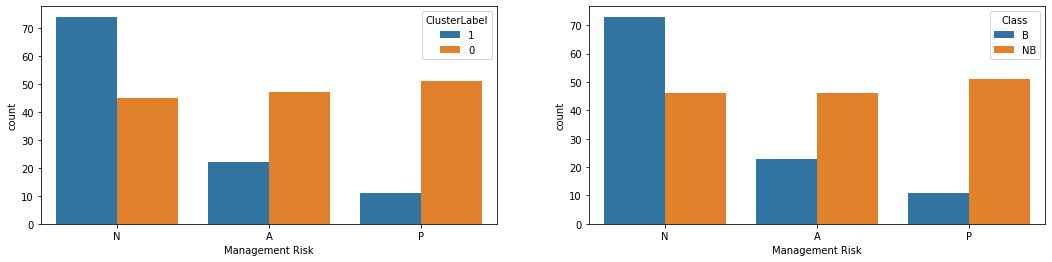

In [143]:
#Management Risk
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(18,4))
sns.countplot(X_back_df["Management Risk"],hue=X_back_df["ClusterLabel"],hue_order=[1,0],ax=ax1)
sns.countplot(X_back_df["Management Risk"],hue=X_back_df["Class"],ax=ax2)

#As expected they are very similar

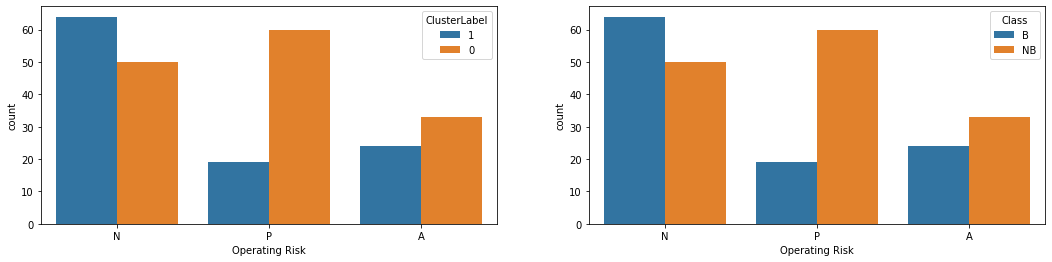

In [144]:
#Operating Risk
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(18,4))
sns.countplot(X_back_df["Operating Risk"],hue=X_back_df["ClusterLabel"],hue_order=[1,0],ax=ax1)
sns.countplot(X_back_df["Operating Risk"],hue=X_back_df["Class"],ax=ax2)

#As expected they are very similar

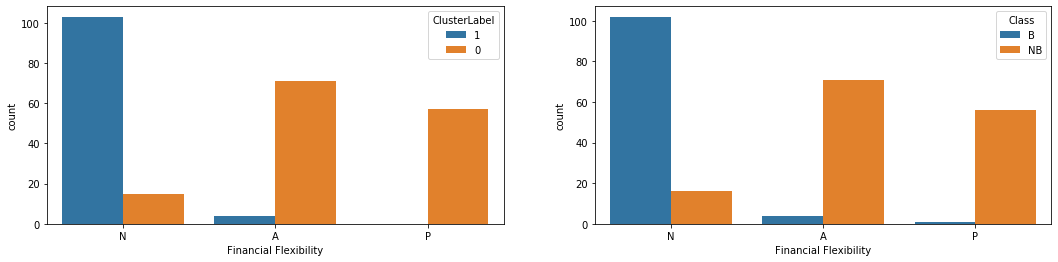

In [145]:
#Financial Flexibility
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(18,4))
sns.countplot(X_back_df["Financial Flexibility"],hue=X_back_df["ClusterLabel"],hue_order=[1,0],ax=ax1)
sns.countplot(X_back_df["Financial Flexibility"],hue=X_back_df["Class"],ax=ax2)

#As expected they are very similar

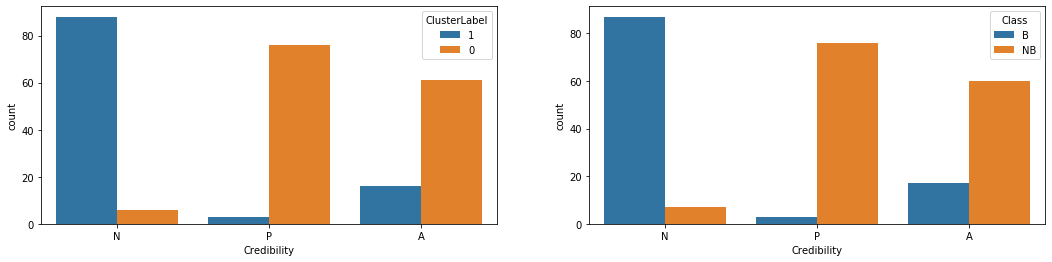

In [146]:
#Credibility              
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(18,4))
sns.countplot(X_back_df["Credibility"],hue=X_back_df["ClusterLabel"],hue_order=[1,0],ax=ax1)
sns.countplot(X_back_df["Credibility"],hue=X_back_df["Class"],ax=ax2)

#As expected they are very similar

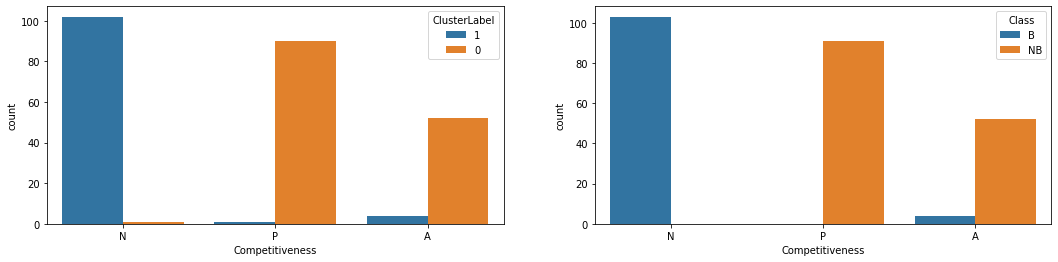

In [147]:
#Competitiveness
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(18,4))
sns.countplot(X_back_df["Competitiveness"],hue=X_back_df["ClusterLabel"],hue_order=[1,0],ax=ax1)
sns.countplot(X_back_df["Competitiveness"],hue=X_back_df["Class"],ax=ax2)

#As expected they are very similar